In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gaze_df = pd.read_csv('test_gaze.csv')

In [3]:
def convert_to_list(s):
    return eval(s)
gaze_df['left_eye_from_center'] = gaze_df['left_eye_from_center'].apply(convert_to_list) 
gaze_df['right_eye_from_center'] = gaze_df['right_eye_from_center'].apply(convert_to_list) 
gaze_df['left_eye_dim'] = gaze_df['left_eye_dim'].apply(convert_to_list) 
gaze_df['right_eye_dim'] = gaze_df['right_eye_dim'].apply(convert_to_list)

print(gaze_df.dtypes)

left_eye_from_center      object
right_eye_from_center     object
time_start               float64
time_end                 float64
left_eye_dim              object
right_eye_dim             object
dtype: object


Eye position:
Where the pupil is relative to the whole eye |---o---| = 50%

In [4]:
def calculate_eye_position(row, eye='right'):
    eye_from_center = row[f'{eye}_eye_from_center'] 
    eye_dim = row[f'{eye}_eye_dim']

    x_position = (float(eye_dim[0]/2) +float(eye_from_center[0])) / float(eye_dim[0]) * 100
    y_position = (float(eye_dim[1]/2) +float(eye_from_center[1])) / float(eye_dim[1]) * 100
    return (x_position, y_position)

In [5]:
gaze_df['right_eye_pos'] = gaze_df.apply(calculate_eye_position, axis=1, eye='right')
gaze_df['left_eye_pos'] = gaze_df.apply(calculate_eye_position, axis=1, eye='left')

gaze_df = gaze_df.drop(['right_eye_from_center', 'left_eye_from_center', 'right_eye_dim', 'left_eye_dim'], axis=1)
#gaze_df.head

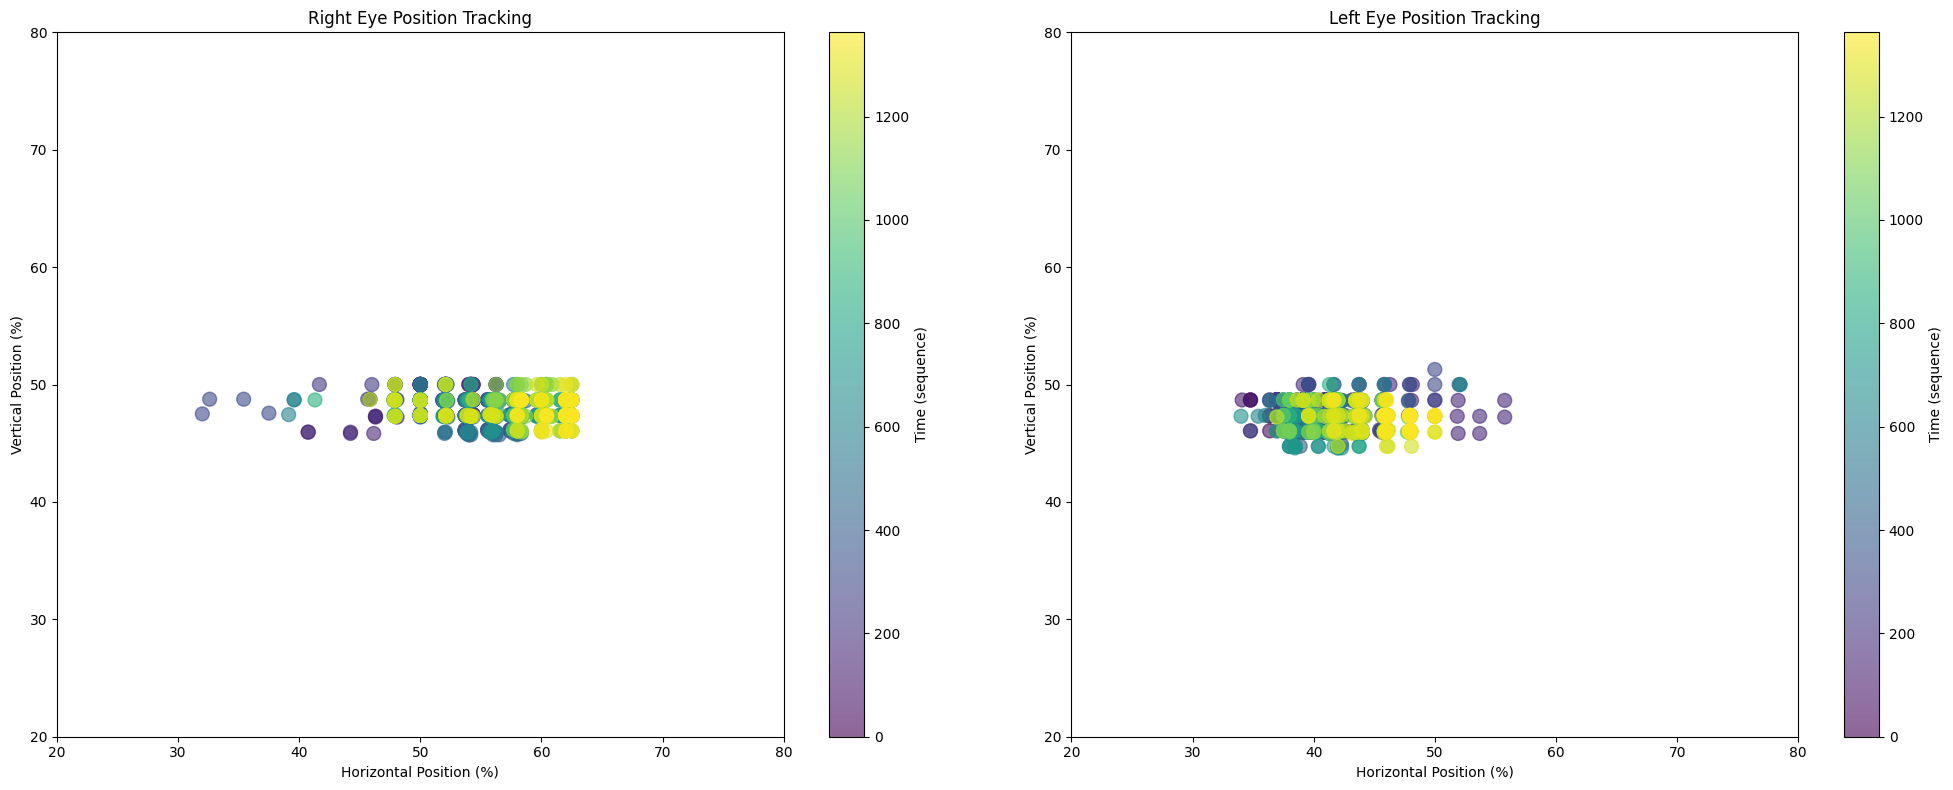

In [6]:
# Separate the x and y coordinates for both eyes
# Extract x, y coordinates for both eyes
right_eye_x = [pos[0] for pos in gaze_df['right_eye_pos']]
right_eye_y = [pos[1] for pos in gaze_df['right_eye_pos']]
left_eye_x = [pos[0] for pos in gaze_df['left_eye_pos']]
left_eye_y = [pos[1] for pos in gaze_df['left_eye_pos']]

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Right eye plot
scatter1 = ax1.scatter(right_eye_x, right_eye_y, 
                      c=range(len(right_eye_x)),  # Use index as time proxy
                      cmap='viridis', s=100, alpha=0.6)  # Increased marker size
ax1.set_xlim(20, 80)  # Zoomed in view
ax1.set_ylim(20, 80)
ax1.set_xlabel('Horizontal Position (%)')
ax1.set_ylabel('Vertical Position (%)')
ax1.set_title('Right Eye Position Tracking')
fig.colorbar(scatter1, ax=ax1, label='Time (sequence)')

# Left eye plot  
scatter2 = ax2.scatter(left_eye_x, left_eye_y,
                      c=range(len(left_eye_x)),  # Use index as time proxy
                      cmap='viridis', s=100, alpha=0.6)  # Increased marker size
ax2.set_xlim(20, 80)  # Zoomed in view
ax2.set_ylim(20, 80)
ax2.set_xlabel('Horizontal Position (%)')
ax2.set_ylabel('Vertical Position (%)')
ax2.set_title('Left Eye Position Tracking')
fig.colorbar(scatter2, ax=ax2, label='Time (sequence)')

plt.tight_layout(w_pad=5)  # Add padding between subplots
plt.show()


Blink Rates and Blink Durations

In [7]:
blink_df = pd.read_csv('test_blink.csv')

<BarContainer object of 62 artists>

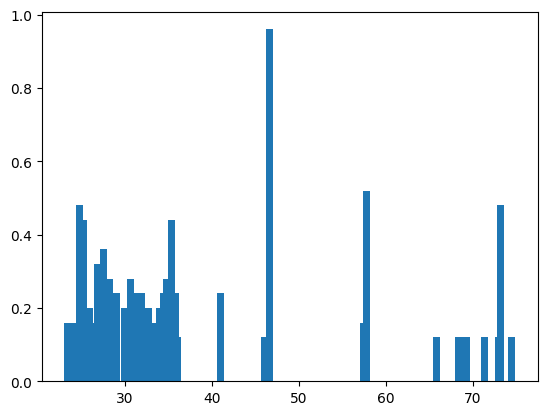

In [8]:
plt.bar(blink_df['start_time'], blink_df['duration'])

In [9]:
blink_df['interval'] = (blink_df['start_time'] // 5).astype(int)
blink_rate_per_interval = blink_df.groupby('interval').size().reset_index(name='blink_rate')

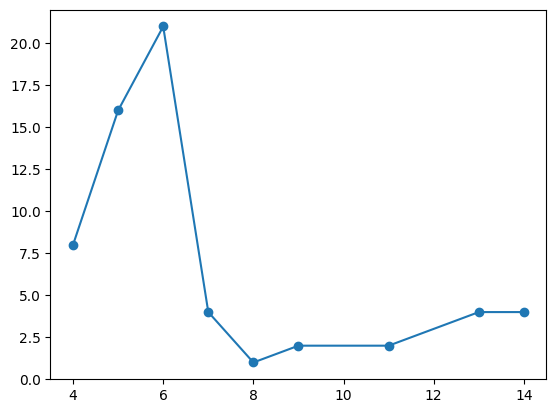

In [10]:
plt.plot(blink_rate_per_interval['interval'], blink_rate_per_interval['blink_rate'], marker='o', linestyle='-')